In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def OU(T,dt, tau, sigma):
    N = int(T/dt)
    x = np.zeros(N)
    for t in range(N-1):
        x[t+1] = x[t] -x[t]/tau*dt + sigma*np.random.normal()*np.sqrt(dt)
    return x

In [26]:
T = 500
dt = 0.002
### I'm running two Ornstein Uhlenbeck processes to simulate two EEG signals (working as if I have two channels)
x1 = OU(T,dt,4,3)
x2 = OU(T,dt,4,3)
x3 = OU(T,dt,4,3)
x4 = OU(T,dt,4,3)
x5 = OU(T,dt,4,3)
x6 = OU(T,dt,4,3)
x7 = OU(T,dt,4,3)
x8 = OU(T,dt,4,3)


channels = np.array([x1,x2,x3,x4,x5,x6,x7,x8])
channels.shape

(8, 250000)

In [27]:
t = np.arange(0,T,dt)

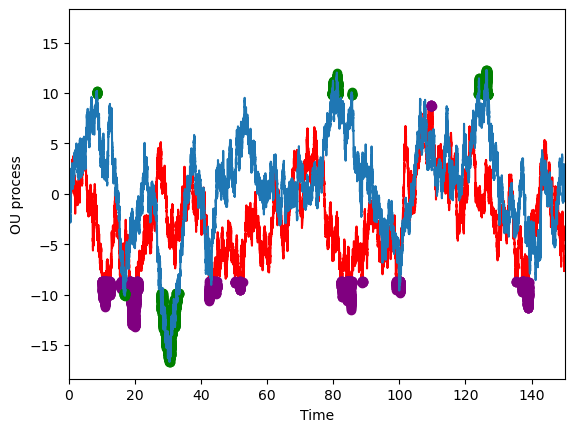

In [30]:
plt.plot(t,x1, 'r')
thr = 2
plt.plot(t[np.abs(x1) > np.std(x1)*thr],x1[np.abs(x1) > np.std(x1)*thr], 'o', color ='purple')
plt.plot(t[np.abs(x2) > np.std(x2)*thr],x2[np.abs(x2) > np.std(x2)*thr], 'go')

plt.plot(t,x2);
plt.xlabel('Time')
plt.ylabel('OU process');
plt.xlim(0,150);

In [12]:
#av_indice.shape

In [34]:
thr

2

In [33]:
#final_t.max()
for i in channels:
    print(i)
    print(i.shape)

[ 0.          0.16641143  0.10506848 ... -3.50763045 -3.59582498
 -3.63336485]
(250000,)
[ 0.         -0.03041839 -0.06725907 ...  4.42279506  4.50959579
  4.51024226]
(250000,)
[0.         0.00243759 0.03736158 ... 0.24423768 0.12727022 0.3565813 ]
(250000,)
[ 0.          0.19413776  0.24985149 ... -2.7031583  -2.82979327
 -2.57826158]
(250000,)
[ 0.         -0.08393183 -0.04255633 ...  0.28134697  0.54549017
  0.37037505]
(250000,)
[ 0.          0.16166892 -0.07383299 ... -0.67099599 -0.57644969
 -0.40072906]
(250000,)
[ 0.         -0.00924416 -0.25399257 ...  5.35233679  5.59811534
  5.53880351]
(250000,)
[ 0.         -0.0855987   0.05840882 ...  5.62015738  5.46635266
  5.28010475]
(250000,)


In [40]:


final_t = np.zeros(channels[0].shape)
#o = 0
for i in channels:
    final_t += np.array(np.abs(i)> np.std(i)*thr, dtype = float)
    o+= 1
#print(o)
final_t = np.array(final_t, dtype = bool)
final_t = np.array(final_t, dtype = float)

final_t.shape, channels.shape

8


((250000,), (8, 250000))

In [41]:
av_indice_start = np.where((final_t[1:] - final_t[:-1]) >0)[0]### these are the indices where an avalanche begins
av_indice_end = np.where((final_t[1:] - final_t[:-1])< 0)[0]### these are the indices where an avalanche ends

In [68]:
from matplotlib import cm
colors = cm.Reds(np.linspace(0.2,1,8))

In [69]:
channels.shape

(8, 250000)

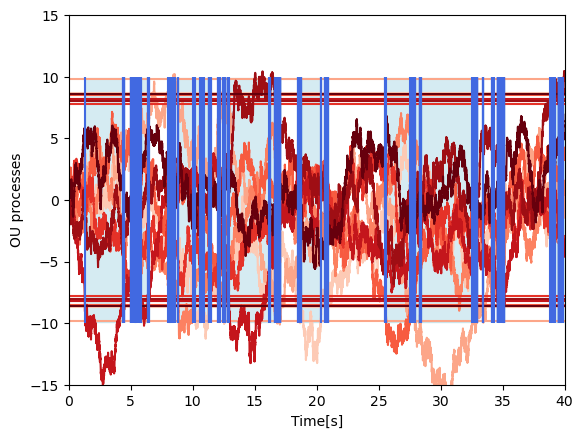

In [91]:
for g in range(len(channels)):
    plt.plot(t,channels[g],color = colors[g])
    plt.hlines(np.std(channels[g])*thr, 0,T,color = colors[g])
    plt.hlines(-np.std(channels[g])*thr, 0,T,color = colors[g])
    
    
for jj in range(len(av_indice_start)):
    #plt.fill_between(np.arange(t[av_indice_start[jj]],t[av_indice_end[jj]] + 0.002,0.002),-10,10, color = 'lightblue', alpha = .5)
    plt.axvspan(t[av_indice_start[jj]],t[av_indice_end[jj]],0.17,1-0.17, color = 'lightblue', alpha = .5)

#plt.vlines(t[np.array(final_t, dtype = bool)],-10,10, alpha = )
plt.vlines(t[av_indice_start],-10,10, color = 'royalblue')
plt.vlines(t[av_indice_end],-10,10, color = 'royalblue')

plt.xlabel('Time[s]')
plt.ylabel('OU processes');
plt.xlim(0.,40);
plt.ylim(-15,15);

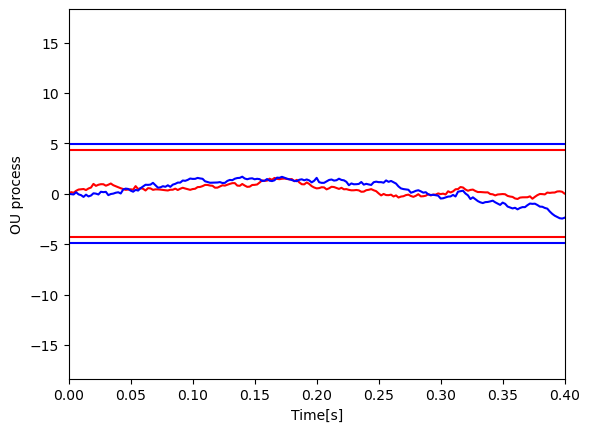

In [74]:
plt.plot(t,(x1), 'r')
plt.plot(t,x2,'b')


plt.vlines(t[av_indice_start],-10,10, color = 'green')
plt.vlines(t[av_indice_end],-10,10, color = 'red')

#plt.vlines(t[np.array(final_t, dtype = bool)],-10,10, alpha =   0.3)


plt.hlines(np.std(x1), 0,T,'r')
plt.hlines(-np.std(x1), 0,T,'r')

plt.hlines(np.std(x2), 0,T,'b')
plt.hlines(-np.std(x2), 0,T,'b')

plt.xlabel('Time[s]')
plt.ylabel('OU process');
plt.xlim(0,0.4);

In [75]:
if len(av_indice_start) < len(av_indice_end):
    av_indice_start = np.insert(av_indice_start,0,0)
    
    
if len(av_indice_start) > len(av_indice_end):
    #print(av_indice_end)
    av_indice_end = np.append(av_indice_end,len(x1)-1)

In [77]:
channels.shape

(8, 250000)

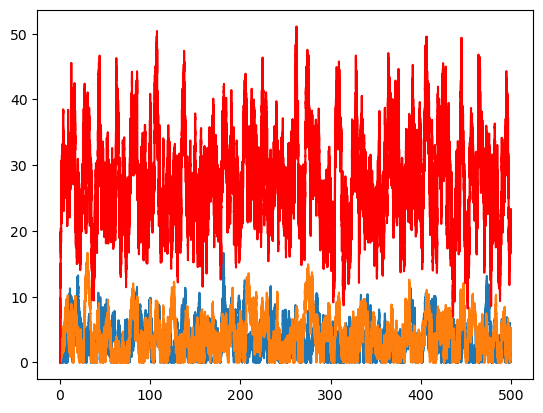

In [78]:
global_signal = np.zeros(channels[0].shape)
for i in channels:
    global_signal+= np.abs(i)
    
plt.plot(t,np.abs(x1) )
plt.plot(t,np.abs(x2) )
plt.plot(t,global_signal,'r' )

In [79]:
len(av_indice_start) ,len(av_indice_end)

(2005, 2005)

In [80]:
global_signal = np.zeros(channels[0].shape)
for i in channels:
    global_signal+= np.abs(i)
    

avalanche_sizes = []
avalanche_dur = []

for s in range(len(av_indice_start)):
    if len(av_indice_start) != len(av_indice_end):
        print('Error, they must be of the same length')
        break
    avalanche_sizes.append(np.sum(global_signal[av_indice_start[s]:av_indice_end[s]]))
    avalanche_dur.append(t[av_indice_end[s]]- t[av_indice_start[s]])
    

In [81]:
len(avalanche_sizes), len(avalanche_dur)

(2005, 2005)

In [4]:
1000*20/0.001

20000000.0

In [6]:
1/500

0.002

In [10]:
1000*8/0.001

8000000.0